In [1]:
from transformers import AutoModelForMaskedLM, TrainingArguments, Trainer, AutoTokenizer
import torch

from lava import LavaModel
model = LavaModel.from_lava_pretrained('roberta-base', 'facebook/bart-base')

from utils.datasets_config import get_dataset

dset = get_dataset('gigaword', 'facebook/bart-base')
print(dset)

tokenizer = AutoTokenizer.from_pretrained('facebook/bart-base')




Some weights of BartForQuestionAnswering were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You passed along `num_labels=3` with an incompatible id to label map: {0: 'LABEL_0', 1: 'LABEL_1'}. The number of labels wil be overwritten to 2.
Found cached dataset gigaword (/home/ruihan/.cache/huggingface/datasets/gigaword/default/1.2.0/ea83a8b819190acac5f2dae011fad51dccf269a0604ec5dd24795b64efb424b6)


  0%|          | 0/3 [00:00<?, ?it/s]

Loading cached processed dataset at /home/ruihan/.cache/huggingface/datasets/gigaword/default/1.2.0/ea83a8b819190acac5f2dae011fad51dccf269a0604ec5dd24795b64efb424b6/cache-6816d5b30b6eeb9a.arrow
Loading cached processed dataset at /home/ruihan/.cache/huggingface/datasets/gigaword/default/1.2.0/ea83a8b819190acac5f2dae011fad51dccf269a0604ec5dd24795b64efb424b6/cache-6aeaeef7bff602c5.arrow
Loading cached processed dataset at /home/ruihan/.cache/huggingface/datasets/gigaword/default/1.2.0/ea83a8b819190acac5f2dae011fad51dccf269a0604ec5dd24795b64efb424b6/cache-29041409e3286f61.arrow


Number of gigaword training examples: 3803957
Number of gigaword validation examples: 189651
Number of gigaword testing examples: 1951
DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels', 'input_texts', 'label_texts'],
        num_rows: 3803957
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels', 'input_texts', 'label_texts'],
        num_rows: 189651
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels', 'input_texts', 'label_texts'],
        num_rows: 1951
    })
})


In [14]:
ckpt = torch.load('/home/ruihan/Downloads/or/seq2seq-ngram/lava-ce/checkpoint-210000/pytorch_model.bin')

In [15]:
model.load_state_dict(ckpt)

<All keys matched successfully>

In [16]:
d = next(iter(dset['train'].shard(300, 1).shuffle(0)))
decoder_input_ids = (d['labels'] == 1).long()



Loading cached shuffled indices for dataset at /home/ruihan/.cache/huggingface/datasets/gigaword/default/1.2.0/ea83a8b819190acac5f2dae011fad51dccf269a0604ec5dd24795b64efb424b6/cache-b3cb70f2e5b25a48.arrow


In [17]:
o = model(
    input_ids = d['input_ids'].to(model.device).unsqueeze(0),
    attention_mask = d['attention_mask'].to(model.device).unsqueeze(0),
#     labels = d['labels'].to(model.device).unsqueeze(0),
)

tensor(95.)
att tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.]])
end tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0

In [6]:
# d = tokenizer("in a city passionate about the environment and technology  commuters are usingonna smart phones to check in at a social networkingSCP to keep ater threatened by climate from checking out ", return_tensors = 'pt')

# o = model(
#     input_ids = d['input_ids'].to(model.device),
#     attention_mask = d['attention_mask'].to(model.device),
# )

In [7]:
d

{'input_ids': tensor([50264,   611,  1097,   611,   879,  1437,  1437,  9489,  1855,  1243,
          1437,  1437, 16874, 50264, 50264,  1437,   784, 20815,  1437,  3023,
           179, 39176,  1437,   910, 20815,  1437,  1437,  1437, 50264, 50264,
           849, 48134,  1855,  1243,  2604, 50264,  6485, 26879,  1437,   784,
         20815,  1437,  2604,   530,  1437,   910, 20815,  1437,  1015,    16,
          1768,     7,    28,   547,    15,   579, 47035, 50264, 24622,   611,
           879, 50264,  1437,   812,     9,  1236,   718,   179,  2791,  1437,
          1437,  9489, 22683,  1243,  1437,  1437,    41,   781,    26,  6664,
         21746,  1437,  1437,     2]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'labels

In [8]:
o.logits.argmax(2)

tensor([[    0,     2,    12,     6,     6,     6,     6,     2,     6,     6,
             6,     6,     6,     6,     6,     6, 12254,  3907,     6,     6,
             6,     6,     6,     6,     6,     2,     6,     6,     6,     6,
          4798,     6,     6,     6,     6,     6,     6,     6, 12254, 12254,
             6,     6,     6,     6,     6,     6,     6,     6,     6,     6,
             6,     6,     6,     6,     6,    12,     6,     6,     6,     2,
             6,     6,     6,     2,     2,     2,     2,     2,     6,     6,
             6,     6,     2,     2,     2,     2,     2, 23595,    12,    12,
             6,     6,     6,     2]])

In [9]:
tokenizer.decode(o.logits.argmax(2).tolist()[0], skip_special_tokens=False)


'<s></s>-,,,,</s>,,,,,,,, unrest tree,,,,,,,</s>,,,, harm,,,,,,, unrest unrest,,,,,,,,,,,,,,,-,,,</s>,,,</s></s></s></s></s>,,,,</s></s></s></s></s> zip--,,,</s>'

In [10]:
print(tokenizer.decode(d['input_ids'], skip_special_tokens=True))
print()
print(tokenizer.decode(d['labels'], skip_special_tokens=True))

changchun   northeast china   oct  lrb  xinliber  rrb    #### china UN mountain biking  lrb  UNK  rrb  race is scheduled to be held on saturday changchun  capital of jilin province   northeast Acquina   an official said friday  

china  s ne city to hold first ever UNK mountain biking race


In [11]:
scores = model.decoder(input_ids = d['input_ids'].to(model.device).unsqueeze(0), decoder_input_ids = 50264 * torch.ones_like(d['input_ids']).to(model.device).unsqueeze(0)).end_logits
scores

tensor([[0.1673, 0.1672, 0.7139, 0.5691, 0.4119, 0.1521, 0.1553, 0.1949, 0.2377,
         0.2538, 0.2492, 0.2406, 0.2381, 0.2470, 0.2698, 0.2774, 0.2791, 0.2881,
         0.3025, 0.3293, 0.3789, 0.4656, 0.5682, 0.6254, 0.6558, 0.6629, 0.6533,
         0.6381, 0.6228, 0.6016, 0.5859, 0.5900, 0.5987, 0.6136, 0.6200, 0.6034,
         0.5813, 0.5532, 0.5312, 0.5140, 0.5292, 0.5228, 0.5069, 0.5148, 0.5045,
         0.4818, 0.4693, 0.4377, 0.4172, 0.4168, 0.4365, 0.4459, 0.4558, 0.4700,
         0.4640, 0.4683, 0.4855, 0.5034, 0.5008, 0.4892, 0.5072, 0.5287, 0.5530,
         0.5594, 0.5643, 0.5640, 0.5630, 0.5597, 0.5482, 0.5451, 0.5301, 0.5286,
         0.5321, 0.5331, 0.5366, 0.5267, 0.5226, 0.5254, 0.5134, 0.5022, 0.4895,
         0.4948, 0.4858, 0.4888]], grad_fn=<CloneBackward0>)

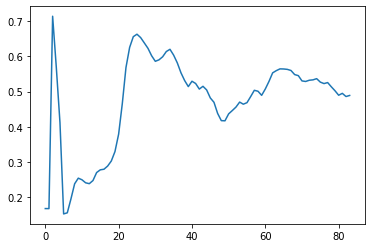

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(scores.tolist()[0])

In [13]:
model.decoder(input_ids = d['input_ids'].to(model.device).unsqueeze(0), decoder_input_ids = 50264 * torch.ones_like(d['labels']).to(model.device).unsqueeze(0)).end_logits

tensor([[0.1673, 0.1672, 0.7139, 0.5691, 0.4119, 0.1521, 0.1553, 0.1949, 0.2377,
         0.2538, 0.2492, 0.2406, 0.2381, 0.2470, 0.2698, 0.2774, 0.2791]],
       grad_fn=<CloneBackward0>)